In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

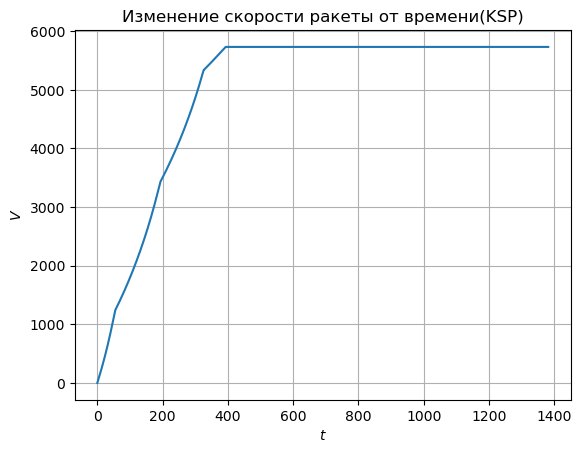

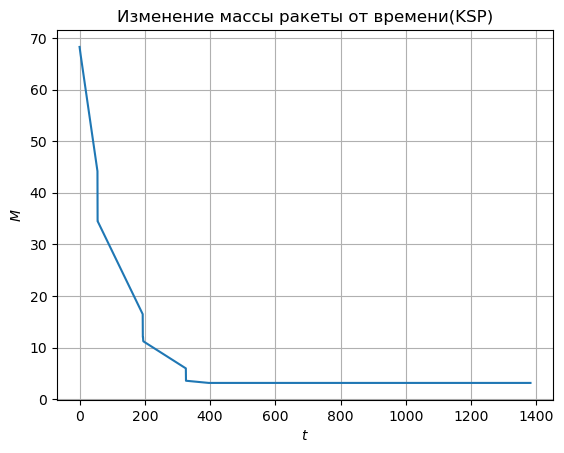

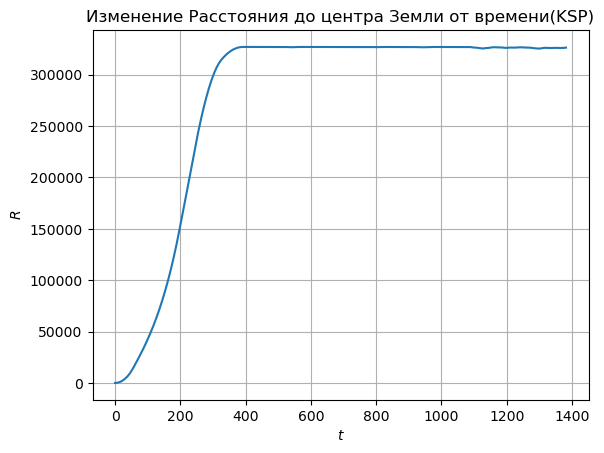

In [188]:
data_ksp = pd.read_csv("ksp.csv", sep=";")
Time = data_ksp["TimeSinceMark"]
Velocity = data_ksp["DeltaVExpended"]
plt.plot(Time, Velocity)
plt.ylabel(r'$V$')
plt.xlabel(r'$t$')
plt.title(r'Изменение скорости ракеты от времени(KSP)')
plt.grid(True)
plt.show()

data_ksp = pd.read_csv("ksp.csv", sep=";")
Time = data_ksp["TimeSinceMark"]
Value = data_ksp["Mass"]
plt.plot(Time, Value)
plt.ylabel(r'$M$')
plt.xlabel(r'$t$')
plt.title(r'Изменение массы ракеты от времени(KSP)')
plt.grid(True)
plt.show()

data_ksp = pd.read_csv("ksp.csv", sep=";")
Time = data_ksp["TimeSinceMark"]
Value = data_ksp["AltitudeTrue"]
plt.plot(Time, Value)
plt.ylabel(r'$R$')
plt.xlabel(r'$t$')
plt.title(r'Изменение Расстояния до центра Земли от времени(KSP)')
plt.grid(True)
plt.show()

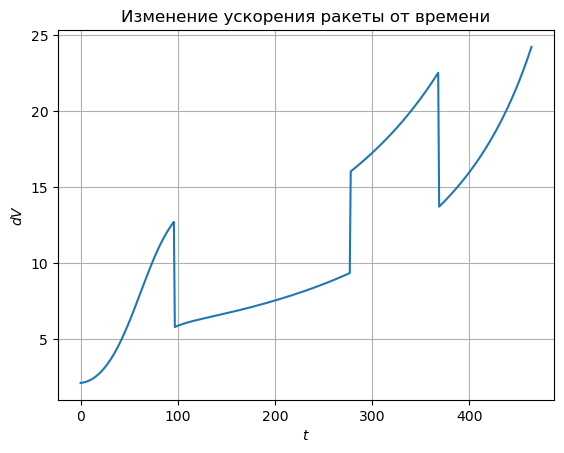

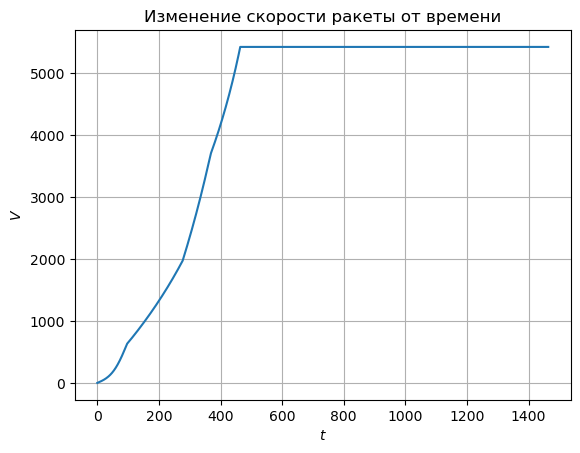

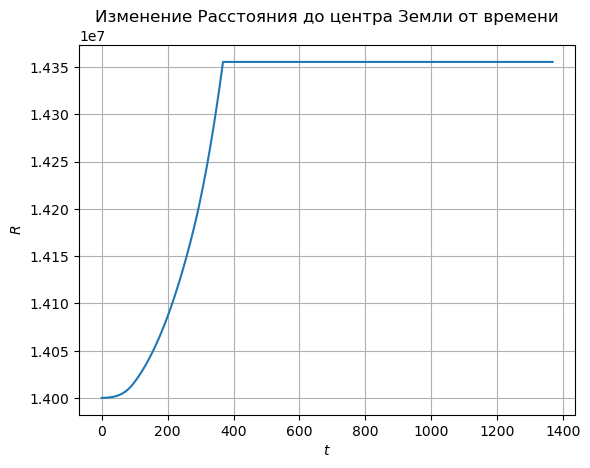

In [6]:
from math import e

cos45 = 2 ** 0.5 / 2
G = 6.67430 * 10 ** (-11)
a = 360_000
b = 180_000
Mz = 5.2915793 * 10 ** 22
Pa = 1000_000
Pa2 = 200_000
Sa1 = 1
Sa2 = 0.2
Wa = 1000

m = (44.171 + 34.585 + 12.063 + 3.600) * 10 ** 3
mf = 24.120 * 10 ** 3
dm = 250
dt = 1
R = 14_000_000
Velocity = 0
altitude = 0


def Ftyag(G, rm, Mz, R):
    return G * (rm * Mz) / R ** 2


def Pn(alt):
    return 1000_000 * e ** (-alt / 5000)


h_graph = np.array([])
v_graph1 = np.array([])
velocity_graph = np.array([])
mass_graph = np.array([])
time_graph = np.array([0])
while mf >= 0:
    mf -= dm
    rm = mf + m
    
    Ft = Ftyag(G, rm, Mz, R)
    P = dm / dt * Wa + (Pa - Pn(R - 14_000_000)) * Sa1
    dV = dt * (P + Ft) / rm

    Velocity += dV
    altitude = Velocity * cos45
    R += altitude
    
    h_graph = np.append(h_graph, R)
    v_graph1 = np.append(v_graph1, dV)
    velocity_graph = np.append(velocity_graph, Velocity)
    mass_graph = np.append(mass_graph, rm)


mf = 18.001 * 10 ** 3
m =  (16.584 + 12.063 + 3.600) * 10 ** 3
dm = 100

v_graph2 = np.array([])
while mf >= 0:
    mf -= dm
    rm = mf + m
    
    Ft = Ftyag(G, rm, Mz, R)
    P = dm / dt * Wa + (Pa - Pn(R - 14_000_000)) * Sa2
    dV = dt * (P + Ft) / rm

    Velocity += dV
    altitude = Velocity * cos45
    R += altitude
    
    h_graph = np.append(h_graph, R)
    v_graph2 = np.append(v_graph2, dV)
    velocity_graph = np.append(velocity_graph, Velocity)
    mass_graph = np.append(mass_graph, rm)


mf = 4.500 * 10 ** 3
m = (7.563 + 3.600) * 10 ** 3
dm = 50

v_graph3 = np.array([])
while mf >= 0:
    mf -= dm
    rm = mf + m

    Ft = Ftyag(G, rm, Mz, R)
    P = dm / dt * Wa + (Pa - Pn(R - 14_000_000)) * Sa2
    dV = dt * (P + Ft) / rm

    Velocity += dV
    altitude = Velocity * cos45
    R += altitude

    h_graph = np.append(h_graph, R)
    v_graph3 = np.append(v_graph3, dV)
    velocity_graph = np.append(velocity_graph, Velocity)
    mass_graph = np.append(mass_graph, rm)

mf = 1.900 * 10 ** 3
m = 2.500 * 10 ** 3
dm = 20

v_graph4 = np.array([])
while mf >= 0:
    mf -= dm
    rm = mf + m
    
    Ft = Ftyag(G, rm, Mz, R)
    P = dm / dt * Wa + Pa2 * Sa2
    dV = dt * (P + Ft) / rm

    Velocity += dV
    if Velocity >= 5520:
        break

    v_graph4 = np.append(v_graph4, dV)
    velocity_graph = np.append(velocity_graph, Velocity)
    mass_graph = np.append(mass_graph, rm)

for _ in range(1000):
    V = (G * Mz * (2 / b - 1 / a)) ** 0.5
    velocity_graph = np.append(velocity_graph, Velocity)
    h_graph = np.append(h_graph, R)
    mass_graph = np.append(mass_graph, m + mf)

plt.plot(np.hstack([v_graph1, v_graph2, v_graph3, v_graph4]))
plt.ylabel(r'$dV$')
plt.xlabel(r'$t$')
plt.title(r'Изменение ускорения ракеты от времени')
plt.grid(True)
plt.show()


plt.plot(velocity_graph)
plt.ylabel(r'$V$')
plt.xlabel(r'$t$')
plt.title(r'Изменение скорости ракеты от времени')
plt.grid(True)
plt.show()


plt.plot(h_graph)
plt.ylabel(r'$R$')
plt.xlabel(r'$t$')
plt.title(r'Изменение Расстояния до центра Земли от времени')
plt.grid(True)
plt.show()
plt.show()